## 4(2) LGBM&CAT
221015일 학습시킨 모델의 코드이다. 최종적으로 LGBM을 택했으며 3.2359504988이 나왔다.
- 불필요한 Feature는 3(2)Feature Transformation_221015에 출력되어있다.
- 승학오빠 파일 보고 n_estimators 수를 10000으로 변경했더니 성능이 좀 좋아졌다.

### Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
train = pd.read_csv('../data/feature/20221015_train_select.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})
test = pd.read_csv('../data/feature/20221015_test_select.csv', dtype={'maximum_speed_limit':int, 'weight_restricted':int})

In [3]:
# Feature가 아닌 변수를 제거한다.
train_id, test_id = train['id'], test['id'] ; del train['id'], test['id']

# X_train, y_train, X_test를 지정한다
y_train = train['target'] ; del train['target']
X_train, X_test = train, test
print('X_train.shape:', X_train.shape, 'X_test.shape', X_test.shape)

X_train.shape: (4701217, 32) X_test.shape (291241, 32)


### Split Data

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size=0.2, shuffle=False, random_state=2022)

### $\blacktriangleright$ LGBM

In [9]:
lgbm_reg = LGBMRegressor(n_estimators=10000, metric= 'mae', random_state = 2022)

In [10]:
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'mae', 
            "eval_set" : [(val_X, val_y)],
            'verbose': 1,
            'categorical_feature': ['day_of_week', 'road_rating','connect_code', 'maximum_speed_limit',
                                  'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted']}

In [11]:
lgbm_reg.fit(train_X, train_y, **fit_params)

C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\ha\Anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New cate

[1]	valid_0's l1: 12.3605
[2]	valid_0's l1: 11.5914
[3]	valid_0's l1: 10.8932
[4]	valid_0's l1: 10.2827
[5]	valid_0's l1: 9.74753
[6]	valid_0's l1: 9.27267
[7]	valid_0's l1: 8.85628
[8]	valid_0's l1: 8.48883
[9]	valid_0's l1: 8.16543
[10]	valid_0's l1: 7.86138
[11]	valid_0's l1: 7.58961
[12]	valid_0's l1: 7.37373
[13]	valid_0's l1: 7.16918
[14]	valid_0's l1: 6.98384
[15]	valid_0's l1: 6.81968
[16]	valid_0's l1: 6.68006
[17]	valid_0's l1: 6.55093
[18]	valid_0's l1: 6.43764
[19]	valid_0's l1: 6.33299
[20]	valid_0's l1: 6.24639
[21]	valid_0's l1: 6.16432
[22]	valid_0's l1: 6.09541
[23]	valid_0's l1: 6.03328
[24]	valid_0's l1: 5.97478
[25]	valid_0's l1: 5.90829
[26]	valid_0's l1: 5.83538
[27]	valid_0's l1: 5.78606
[28]	valid_0's l1: 5.73638
[29]	valid_0's l1: 5.69477
[30]	valid_0's l1: 5.64703
[31]	valid_0's l1: 5.60492
[32]	valid_0's l1: 5.57729
[33]	valid_0's l1: 5.53884
[34]	valid_0's l1: 5.48775
[35]	valid_0's l1: 5.44305
[36]	valid_0's l1: 5.41028
[37]	valid_0's l1: 5.37334
[38]	valid

[299]	valid_0's l1: 3.83935
[300]	valid_0's l1: 3.83722
[301]	valid_0's l1: 3.83621
[302]	valid_0's l1: 3.83512
[303]	valid_0's l1: 3.83425
[304]	valid_0's l1: 3.83278
[305]	valid_0's l1: 3.83255
[306]	valid_0's l1: 3.8317
[307]	valid_0's l1: 3.83115
[308]	valid_0's l1: 3.83043
[309]	valid_0's l1: 3.82974
[310]	valid_0's l1: 3.82807
[311]	valid_0's l1: 3.82754
[312]	valid_0's l1: 3.82672
[313]	valid_0's l1: 3.82589
[314]	valid_0's l1: 3.82472
[315]	valid_0's l1: 3.8245
[316]	valid_0's l1: 3.82331
[317]	valid_0's l1: 3.82214
[318]	valid_0's l1: 3.8213
[319]	valid_0's l1: 3.8203
[320]	valid_0's l1: 3.81889
[321]	valid_0's l1: 3.81772
[322]	valid_0's l1: 3.81731
[323]	valid_0's l1: 3.81619
[324]	valid_0's l1: 3.81584
[325]	valid_0's l1: 3.8147
[326]	valid_0's l1: 3.81334
[327]	valid_0's l1: 3.81316
[328]	valid_0's l1: 3.81049
[329]	valid_0's l1: 3.80943
[330]	valid_0's l1: 3.80891
[331]	valid_0's l1: 3.80737
[332]	valid_0's l1: 3.80714
[333]	valid_0's l1: 3.80628
[334]	valid_0's l1: 3.805

[597]	valid_0's l1: 3.66254
[598]	valid_0's l1: 3.66213
[599]	valid_0's l1: 3.66182
[600]	valid_0's l1: 3.66167
[601]	valid_0's l1: 3.66129
[602]	valid_0's l1: 3.66108
[603]	valid_0's l1: 3.66065
[604]	valid_0's l1: 3.66005
[605]	valid_0's l1: 3.65969
[606]	valid_0's l1: 3.65946
[607]	valid_0's l1: 3.65888
[608]	valid_0's l1: 3.65851
[609]	valid_0's l1: 3.65805
[610]	valid_0's l1: 3.65783
[611]	valid_0's l1: 3.65722
[612]	valid_0's l1: 3.65684
[613]	valid_0's l1: 3.65635
[614]	valid_0's l1: 3.65593
[615]	valid_0's l1: 3.65549
[616]	valid_0's l1: 3.65509
[617]	valid_0's l1: 3.65487
[618]	valid_0's l1: 3.65468
[619]	valid_0's l1: 3.65427
[620]	valid_0's l1: 3.65369
[621]	valid_0's l1: 3.65337
[622]	valid_0's l1: 3.65325
[623]	valid_0's l1: 3.65307
[624]	valid_0's l1: 3.65299
[625]	valid_0's l1: 3.65259
[626]	valid_0's l1: 3.65229
[627]	valid_0's l1: 3.65172
[628]	valid_0's l1: 3.65156
[629]	valid_0's l1: 3.65141
[630]	valid_0's l1: 3.65108
[631]	valid_0's l1: 3.65094
[632]	valid_0's l1: 

[892]	valid_0's l1: 3.58883
[893]	valid_0's l1: 3.58838
[894]	valid_0's l1: 3.58804
[895]	valid_0's l1: 3.58779
[896]	valid_0's l1: 3.58771
[897]	valid_0's l1: 3.5874
[898]	valid_0's l1: 3.58714
[899]	valid_0's l1: 3.58707
[900]	valid_0's l1: 3.58699
[901]	valid_0's l1: 3.58697
[902]	valid_0's l1: 3.58664
[903]	valid_0's l1: 3.58637
[904]	valid_0's l1: 3.58624
[905]	valid_0's l1: 3.58593
[906]	valid_0's l1: 3.58578
[907]	valid_0's l1: 3.58569
[908]	valid_0's l1: 3.58558
[909]	valid_0's l1: 3.58549
[910]	valid_0's l1: 3.58528
[911]	valid_0's l1: 3.58508
[912]	valid_0's l1: 3.58445
[913]	valid_0's l1: 3.58427
[914]	valid_0's l1: 3.5842
[915]	valid_0's l1: 3.5841
[916]	valid_0's l1: 3.58377
[917]	valid_0's l1: 3.58363
[918]	valid_0's l1: 3.58348
[919]	valid_0's l1: 3.58335
[920]	valid_0's l1: 3.583
[921]	valid_0's l1: 3.58282
[922]	valid_0's l1: 3.58264
[923]	valid_0's l1: 3.58249
[924]	valid_0's l1: 3.58229
[925]	valid_0's l1: 3.5822
[926]	valid_0's l1: 3.5821
[927]	valid_0's l1: 3.58204

[1180]	valid_0's l1: 3.5469
[1181]	valid_0's l1: 3.54674
[1182]	valid_0's l1: 3.54671
[1183]	valid_0's l1: 3.54662
[1184]	valid_0's l1: 3.54652
[1185]	valid_0's l1: 3.54631
[1186]	valid_0's l1: 3.54626
[1187]	valid_0's l1: 3.54605
[1188]	valid_0's l1: 3.54593
[1189]	valid_0's l1: 3.54577
[1190]	valid_0's l1: 3.54549
[1191]	valid_0's l1: 3.54541
[1192]	valid_0's l1: 3.54526
[1193]	valid_0's l1: 3.5451
[1194]	valid_0's l1: 3.545
[1195]	valid_0's l1: 3.54486
[1196]	valid_0's l1: 3.5448
[1197]	valid_0's l1: 3.54474
[1198]	valid_0's l1: 3.54464
[1199]	valid_0's l1: 3.54451
[1200]	valid_0's l1: 3.5443
[1201]	valid_0's l1: 3.54422
[1202]	valid_0's l1: 3.5441
[1203]	valid_0's l1: 3.54405
[1204]	valid_0's l1: 3.54399
[1205]	valid_0's l1: 3.54396
[1206]	valid_0's l1: 3.54369
[1207]	valid_0's l1: 3.54366
[1208]	valid_0's l1: 3.5436
[1209]	valid_0's l1: 3.54356
[1210]	valid_0's l1: 3.54347
[1211]	valid_0's l1: 3.54332
[1212]	valid_0's l1: 3.54315
[1213]	valid_0's l1: 3.54312
[1214]	valid_0's l1: 3

[1464]	valid_0's l1: 3.52032
[1465]	valid_0's l1: 3.52029
[1466]	valid_0's l1: 3.52017
[1467]	valid_0's l1: 3.52012
[1468]	valid_0's l1: 3.52007
[1469]	valid_0's l1: 3.52005
[1470]	valid_0's l1: 3.52
[1471]	valid_0's l1: 3.51996
[1472]	valid_0's l1: 3.51991
[1473]	valid_0's l1: 3.51983
[1474]	valid_0's l1: 3.51975
[1475]	valid_0's l1: 3.51969
[1476]	valid_0's l1: 3.51957
[1477]	valid_0's l1: 3.51951
[1478]	valid_0's l1: 3.51949
[1479]	valid_0's l1: 3.51939
[1480]	valid_0's l1: 3.51935
[1481]	valid_0's l1: 3.51933
[1482]	valid_0's l1: 3.51922
[1483]	valid_0's l1: 3.51915
[1484]	valid_0's l1: 3.51914
[1485]	valid_0's l1: 3.51907
[1486]	valid_0's l1: 3.51901
[1487]	valid_0's l1: 3.51892
[1488]	valid_0's l1: 3.51887
[1489]	valid_0's l1: 3.51884
[1490]	valid_0's l1: 3.5188
[1491]	valid_0's l1: 3.51867
[1492]	valid_0's l1: 3.51863
[1493]	valid_0's l1: 3.51859
[1494]	valid_0's l1: 3.51853
[1495]	valid_0's l1: 3.51846
[1496]	valid_0's l1: 3.51842
[1497]	valid_0's l1: 3.51833
[1498]	valid_0's l

[1748]	valid_0's l1: 3.50218
[1749]	valid_0's l1: 3.50215
[1750]	valid_0's l1: 3.50212
[1751]	valid_0's l1: 3.50211
[1752]	valid_0's l1: 3.5021
[1753]	valid_0's l1: 3.50208
[1754]	valid_0's l1: 3.50206
[1755]	valid_0's l1: 3.50199
[1756]	valid_0's l1: 3.50187
[1757]	valid_0's l1: 3.50181
[1758]	valid_0's l1: 3.50171
[1759]	valid_0's l1: 3.50157
[1760]	valid_0's l1: 3.50154
[1761]	valid_0's l1: 3.50145
[1762]	valid_0's l1: 3.50139
[1763]	valid_0's l1: 3.50137
[1764]	valid_0's l1: 3.50125
[1765]	valid_0's l1: 3.5012
[1766]	valid_0's l1: 3.50117
[1767]	valid_0's l1: 3.50111
[1768]	valid_0's l1: 3.50102
[1769]	valid_0's l1: 3.50099
[1770]	valid_0's l1: 3.50096
[1771]	valid_0's l1: 3.50089
[1772]	valid_0's l1: 3.50087
[1773]	valid_0's l1: 3.50085
[1774]	valid_0's l1: 3.50081
[1775]	valid_0's l1: 3.50081
[1776]	valid_0's l1: 3.50077
[1777]	valid_0's l1: 3.50069
[1778]	valid_0's l1: 3.50059
[1779]	valid_0's l1: 3.50052
[1780]	valid_0's l1: 3.50049
[1781]	valid_0's l1: 3.50047
[1782]	valid_0's

[2036]	valid_0's l1: 3.48589
[2037]	valid_0's l1: 3.48584
[2038]	valid_0's l1: 3.48581
[2039]	valid_0's l1: 3.48577
[2040]	valid_0's l1: 3.48574
[2041]	valid_0's l1: 3.48571
[2042]	valid_0's l1: 3.48565
[2043]	valid_0's l1: 3.48565
[2044]	valid_0's l1: 3.48559
[2045]	valid_0's l1: 3.48551
[2046]	valid_0's l1: 3.48549
[2047]	valid_0's l1: 3.48538
[2048]	valid_0's l1: 3.4853
[2049]	valid_0's l1: 3.48522
[2050]	valid_0's l1: 3.48514
[2051]	valid_0's l1: 3.48504
[2052]	valid_0's l1: 3.48503
[2053]	valid_0's l1: 3.48496
[2054]	valid_0's l1: 3.48491
[2055]	valid_0's l1: 3.48484
[2056]	valid_0's l1: 3.48482
[2057]	valid_0's l1: 3.48479
[2058]	valid_0's l1: 3.48475
[2059]	valid_0's l1: 3.48474
[2060]	valid_0's l1: 3.48468
[2061]	valid_0's l1: 3.48444
[2062]	valid_0's l1: 3.4844
[2063]	valid_0's l1: 3.48434
[2064]	valid_0's l1: 3.48431
[2065]	valid_0's l1: 3.48422
[2066]	valid_0's l1: 3.48411
[2067]	valid_0's l1: 3.48406
[2068]	valid_0's l1: 3.48384
[2069]	valid_0's l1: 3.48381
[2070]	valid_0's

[2323]	valid_0's l1: 3.47109
[2324]	valid_0's l1: 3.47105
[2325]	valid_0's l1: 3.47104
[2326]	valid_0's l1: 3.47099
[2327]	valid_0's l1: 3.47099
[2328]	valid_0's l1: 3.47097
[2329]	valid_0's l1: 3.47094
[2330]	valid_0's l1: 3.47094
[2331]	valid_0's l1: 3.47092
[2332]	valid_0's l1: 3.47091
[2333]	valid_0's l1: 3.47088
[2334]	valid_0's l1: 3.47083
[2335]	valid_0's l1: 3.47077
[2336]	valid_0's l1: 3.47074
[2337]	valid_0's l1: 3.47072
[2338]	valid_0's l1: 3.47064
[2339]	valid_0's l1: 3.47063
[2340]	valid_0's l1: 3.47063
[2341]	valid_0's l1: 3.47062
[2342]	valid_0's l1: 3.4705
[2343]	valid_0's l1: 3.47047
[2344]	valid_0's l1: 3.47042
[2345]	valid_0's l1: 3.47039
[2346]	valid_0's l1: 3.47035
[2347]	valid_0's l1: 3.47034
[2348]	valid_0's l1: 3.47032
[2349]	valid_0's l1: 3.47024
[2350]	valid_0's l1: 3.47024
[2351]	valid_0's l1: 3.47018
[2352]	valid_0's l1: 3.47013
[2353]	valid_0's l1: 3.47012
[2354]	valid_0's l1: 3.4701
[2355]	valid_0's l1: 3.47009
[2356]	valid_0's l1: 3.47
[2357]	valid_0's l1

[2612]	valid_0's l1: 3.46116
[2613]	valid_0's l1: 3.46115
[2614]	valid_0's l1: 3.46113
[2615]	valid_0's l1: 3.4611
[2616]	valid_0's l1: 3.46108
[2617]	valid_0's l1: 3.46104
[2618]	valid_0's l1: 3.46103
[2619]	valid_0's l1: 3.46095
[2620]	valid_0's l1: 3.46092
[2621]	valid_0's l1: 3.46089
[2622]	valid_0's l1: 3.46085
[2623]	valid_0's l1: 3.46083
[2624]	valid_0's l1: 3.46081
[2625]	valid_0's l1: 3.4608
[2626]	valid_0's l1: 3.46075
[2627]	valid_0's l1: 3.46071
[2628]	valid_0's l1: 3.46067
[2629]	valid_0's l1: 3.46065
[2630]	valid_0's l1: 3.46064
[2631]	valid_0's l1: 3.46055
[2632]	valid_0's l1: 3.46055
[2633]	valid_0's l1: 3.46053
[2634]	valid_0's l1: 3.46049
[2635]	valid_0's l1: 3.46046
[2636]	valid_0's l1: 3.46044
[2637]	valid_0's l1: 3.46041
[2638]	valid_0's l1: 3.46039
[2639]	valid_0's l1: 3.46034
[2640]	valid_0's l1: 3.46031
[2641]	valid_0's l1: 3.4603
[2642]	valid_0's l1: 3.46028
[2643]	valid_0's l1: 3.46024
[2644]	valid_0's l1: 3.46019
[2645]	valid_0's l1: 3.46016
[2646]	valid_0's 

[2897]	valid_0's l1: 3.45101
[2898]	valid_0's l1: 3.45096
[2899]	valid_0's l1: 3.45089
[2900]	valid_0's l1: 3.45083
[2901]	valid_0's l1: 3.45081
[2902]	valid_0's l1: 3.45074
[2903]	valid_0's l1: 3.45067
[2904]	valid_0's l1: 3.45068
[2905]	valid_0's l1: 3.45062
[2906]	valid_0's l1: 3.45057
[2907]	valid_0's l1: 3.45053
[2908]	valid_0's l1: 3.45054
[2909]	valid_0's l1: 3.45054
[2910]	valid_0's l1: 3.45052
[2911]	valid_0's l1: 3.4505
[2912]	valid_0's l1: 3.45049
[2913]	valid_0's l1: 3.45043
[2914]	valid_0's l1: 3.4504
[2915]	valid_0's l1: 3.45036
[2916]	valid_0's l1: 3.45036
[2917]	valid_0's l1: 3.45034
[2918]	valid_0's l1: 3.4503
[2919]	valid_0's l1: 3.45029
[2920]	valid_0's l1: 3.45029
[2921]	valid_0's l1: 3.45023
[2922]	valid_0's l1: 3.45021
[2923]	valid_0's l1: 3.45019
[2924]	valid_0's l1: 3.45019
[2925]	valid_0's l1: 3.45017
[2926]	valid_0's l1: 3.4501
[2927]	valid_0's l1: 3.45007
[2928]	valid_0's l1: 3.45002
[2929]	valid_0's l1: 3.44998
[2930]	valid_0's l1: 3.44994
[2931]	valid_0's l

[3185]	valid_0's l1: 3.441
[3186]	valid_0's l1: 3.44096
[3187]	valid_0's l1: 3.44092
[3188]	valid_0's l1: 3.4409
[3189]	valid_0's l1: 3.44085
[3190]	valid_0's l1: 3.44084
[3191]	valid_0's l1: 3.44083
[3192]	valid_0's l1: 3.44081
[3193]	valid_0's l1: 3.44079
[3194]	valid_0's l1: 3.44076
[3195]	valid_0's l1: 3.44072
[3196]	valid_0's l1: 3.44071
[3197]	valid_0's l1: 3.44064
[3198]	valid_0's l1: 3.44061
[3199]	valid_0's l1: 3.44061
[3200]	valid_0's l1: 3.44053
[3201]	valid_0's l1: 3.44048
[3202]	valid_0's l1: 3.44043
[3203]	valid_0's l1: 3.44038
[3204]	valid_0's l1: 3.44035
[3205]	valid_0's l1: 3.44028
[3206]	valid_0's l1: 3.44025
[3207]	valid_0's l1: 3.44023
[3208]	valid_0's l1: 3.44015
[3209]	valid_0's l1: 3.44009
[3210]	valid_0's l1: 3.44009
[3211]	valid_0's l1: 3.44005
[3212]	valid_0's l1: 3.44
[3213]	valid_0's l1: 3.43997
[3214]	valid_0's l1: 3.43996
[3215]	valid_0's l1: 3.43995
[3216]	valid_0's l1: 3.43991
[3217]	valid_0's l1: 3.43989
[3218]	valid_0's l1: 3.43987
[3219]	valid_0's l1:

[3476]	valid_0's l1: 3.43322
[3477]	valid_0's l1: 3.4332
[3478]	valid_0's l1: 3.43315
[3479]	valid_0's l1: 3.43313
[3480]	valid_0's l1: 3.43312
[3481]	valid_0's l1: 3.43304
[3482]	valid_0's l1: 3.43297
[3483]	valid_0's l1: 3.43292
[3484]	valid_0's l1: 3.43291
[3485]	valid_0's l1: 3.43288
[3486]	valid_0's l1: 3.43287
[3487]	valid_0's l1: 3.43286
[3488]	valid_0's l1: 3.43285
[3489]	valid_0's l1: 3.43282
[3490]	valid_0's l1: 3.43282
[3491]	valid_0's l1: 3.4328
[3492]	valid_0's l1: 3.43279
[3493]	valid_0's l1: 3.43278
[3494]	valid_0's l1: 3.43277
[3495]	valid_0's l1: 3.4327
[3496]	valid_0's l1: 3.43268
[3497]	valid_0's l1: 3.43268
[3498]	valid_0's l1: 3.43265
[3499]	valid_0's l1: 3.43256
[3500]	valid_0's l1: 3.43255
[3501]	valid_0's l1: 3.43252
[3502]	valid_0's l1: 3.43248
[3503]	valid_0's l1: 3.43246
[3504]	valid_0's l1: 3.43243
[3505]	valid_0's l1: 3.43235
[3506]	valid_0's l1: 3.43226
[3507]	valid_0's l1: 3.43225
[3508]	valid_0's l1: 3.43223
[3509]	valid_0's l1: 3.4322
[3510]	valid_0's l

[3763]	valid_0's l1: 3.42605
[3764]	valid_0's l1: 3.42603
[3765]	valid_0's l1: 3.42602
[3766]	valid_0's l1: 3.42599
[3767]	valid_0's l1: 3.42599
[3768]	valid_0's l1: 3.42591
[3769]	valid_0's l1: 3.4259
[3770]	valid_0's l1: 3.4258
[3771]	valid_0's l1: 3.42579
[3772]	valid_0's l1: 3.42574
[3773]	valid_0's l1: 3.42571
[3774]	valid_0's l1: 3.4257
[3775]	valid_0's l1: 3.42567
[3776]	valid_0's l1: 3.42555
[3777]	valid_0's l1: 3.42554
[3778]	valid_0's l1: 3.42552
[3779]	valid_0's l1: 3.42544
[3780]	valid_0's l1: 3.42543
[3781]	valid_0's l1: 3.42541
[3782]	valid_0's l1: 3.42538
[3783]	valid_0's l1: 3.42534
[3784]	valid_0's l1: 3.42532
[3785]	valid_0's l1: 3.42531
[3786]	valid_0's l1: 3.42528
[3787]	valid_0's l1: 3.42518
[3788]	valid_0's l1: 3.42515
[3789]	valid_0's l1: 3.42515
[3790]	valid_0's l1: 3.42513
[3791]	valid_0's l1: 3.42502
[3792]	valid_0's l1: 3.42498
[3793]	valid_0's l1: 3.42494
[3794]	valid_0's l1: 3.42486
[3795]	valid_0's l1: 3.42486
[3796]	valid_0's l1: 3.42483
[3797]	valid_0's 

[4053]	valid_0's l1: 3.41863
[4054]	valid_0's l1: 3.41861
[4055]	valid_0's l1: 3.41855
[4056]	valid_0's l1: 3.41854
[4057]	valid_0's l1: 3.41848
[4058]	valid_0's l1: 3.41848
[4059]	valid_0's l1: 3.41847
[4060]	valid_0's l1: 3.41845
[4061]	valid_0's l1: 3.41841
[4062]	valid_0's l1: 3.4184
[4063]	valid_0's l1: 3.41834
[4064]	valid_0's l1: 3.41833
[4065]	valid_0's l1: 3.41832
[4066]	valid_0's l1: 3.41829
[4067]	valid_0's l1: 3.41826
[4068]	valid_0's l1: 3.41825
[4069]	valid_0's l1: 3.41821
[4070]	valid_0's l1: 3.4182
[4071]	valid_0's l1: 3.4182
[4072]	valid_0's l1: 3.41817
[4073]	valid_0's l1: 3.41817
[4074]	valid_0's l1: 3.41815
[4075]	valid_0's l1: 3.41812
[4076]	valid_0's l1: 3.41811
[4077]	valid_0's l1: 3.4181
[4078]	valid_0's l1: 3.41809
[4079]	valid_0's l1: 3.41808
[4080]	valid_0's l1: 3.41806
[4081]	valid_0's l1: 3.41804
[4082]	valid_0's l1: 3.418
[4083]	valid_0's l1: 3.41799
[4084]	valid_0's l1: 3.41797
[4085]	valid_0's l1: 3.41798
[4086]	valid_0's l1: 3.41789
[4087]	valid_0's l1:

[4342]	valid_0's l1: 3.41219
[4343]	valid_0's l1: 3.41218
[4344]	valid_0's l1: 3.41218
[4345]	valid_0's l1: 3.41216
[4346]	valid_0's l1: 3.41211
[4347]	valid_0's l1: 3.41204
[4348]	valid_0's l1: 3.41202
[4349]	valid_0's l1: 3.412
[4350]	valid_0's l1: 3.41199
[4351]	valid_0's l1: 3.41191
[4352]	valid_0's l1: 3.41189
[4353]	valid_0's l1: 3.41188
[4354]	valid_0's l1: 3.41185
[4355]	valid_0's l1: 3.41185
[4356]	valid_0's l1: 3.41184
[4357]	valid_0's l1: 3.41183
[4358]	valid_0's l1: 3.41184
[4359]	valid_0's l1: 3.4118
[4360]	valid_0's l1: 3.4118
[4361]	valid_0's l1: 3.41173
[4362]	valid_0's l1: 3.41172
[4363]	valid_0's l1: 3.4117
[4364]	valid_0's l1: 3.41168
[4365]	valid_0's l1: 3.41167
[4366]	valid_0's l1: 3.41166
[4367]	valid_0's l1: 3.41164
[4368]	valid_0's l1: 3.41162
[4369]	valid_0's l1: 3.41159
[4370]	valid_0's l1: 3.41158
[4371]	valid_0's l1: 3.41155
[4372]	valid_0's l1: 3.41154
[4373]	valid_0's l1: 3.41154
[4374]	valid_0's l1: 3.41151
[4375]	valid_0's l1: 3.4115
[4376]	valid_0's l1:

[4629]	valid_0's l1: 3.40624
[4630]	valid_0's l1: 3.40623
[4631]	valid_0's l1: 3.40622
[4632]	valid_0's l1: 3.4062
[4633]	valid_0's l1: 3.4062
[4634]	valid_0's l1: 3.40618
[4635]	valid_0's l1: 3.40615
[4636]	valid_0's l1: 3.40611
[4637]	valid_0's l1: 3.40611
[4638]	valid_0's l1: 3.40611
[4639]	valid_0's l1: 3.40608
[4640]	valid_0's l1: 3.40607
[4641]	valid_0's l1: 3.40606
[4642]	valid_0's l1: 3.40605
[4643]	valid_0's l1: 3.40604
[4644]	valid_0's l1: 3.40604
[4645]	valid_0's l1: 3.40602
[4646]	valid_0's l1: 3.40599
[4647]	valid_0's l1: 3.40597
[4648]	valid_0's l1: 3.40596
[4649]	valid_0's l1: 3.40595
[4650]	valid_0's l1: 3.40594
[4651]	valid_0's l1: 3.40592
[4652]	valid_0's l1: 3.40592
[4653]	valid_0's l1: 3.40591
[4654]	valid_0's l1: 3.4059
[4655]	valid_0's l1: 3.40584
[4656]	valid_0's l1: 3.40583
[4657]	valid_0's l1: 3.4058
[4658]	valid_0's l1: 3.40578
[4659]	valid_0's l1: 3.40578
[4660]	valid_0's l1: 3.40576
[4661]	valid_0's l1: 3.40575
[4662]	valid_0's l1: 3.40572
[4663]	valid_0's l

[4913]	valid_0's l1: 3.40158
[4914]	valid_0's l1: 3.40154
[4915]	valid_0's l1: 3.40154
[4916]	valid_0's l1: 3.40151
[4917]	valid_0's l1: 3.40151
[4918]	valid_0's l1: 3.40149
[4919]	valid_0's l1: 3.40148
[4920]	valid_0's l1: 3.40146
[4921]	valid_0's l1: 3.40145
[4922]	valid_0's l1: 3.40144
[4923]	valid_0's l1: 3.40144
[4924]	valid_0's l1: 3.40143
[4925]	valid_0's l1: 3.4014
[4926]	valid_0's l1: 3.4014
[4927]	valid_0's l1: 3.40139
[4928]	valid_0's l1: 3.40138
[4929]	valid_0's l1: 3.40137
[4930]	valid_0's l1: 3.40134
[4931]	valid_0's l1: 3.40133
[4932]	valid_0's l1: 3.40132
[4933]	valid_0's l1: 3.40119
[4934]	valid_0's l1: 3.40116
[4935]	valid_0's l1: 3.40116
[4936]	valid_0's l1: 3.40108
[4937]	valid_0's l1: 3.40107
[4938]	valid_0's l1: 3.40106
[4939]	valid_0's l1: 3.40106
[4940]	valid_0's l1: 3.40103
[4941]	valid_0's l1: 3.40102
[4942]	valid_0's l1: 3.40102
[4943]	valid_0's l1: 3.40101
[4944]	valid_0's l1: 3.40101
[4945]	valid_0's l1: 3.40101
[4946]	valid_0's l1: 3.40099
[4947]	valid_0's

KeyboardInterrupt: 

### $\blacktriangleright$ CatBoost

In [ ]:
cat_params = {'iterations':1000,
              'eval_metric':'MAE',
              'bootstrap_type':'Bayesian',
              'cat_features':['day_of_week', 'road_rating','connect_code', 'maximum_speed_limit',
                              'weight_restricted', 'road_type', 'start_turn_restricted', 'end_turn_restricted'],
              'random_state':2022, 'task_type':"GPU"}

In [11]:
cat_reg = CatBoostRegressor(**cat_params)

In [12]:
cat_reg.fit(train_X, train_y)

Learning rate set to 0.118762


Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 12.3817863	total: 165ms	remaining: 2m 44s
1:	total: 321ms	remaining: 2m 40s
2:	total: 473ms	remaining: 2m 37s
3:	total: 634ms	remaining: 2m 37s
4:	total: 781ms	remaining: 2m 35s
5:	learn: 9.4153837	total: 939ms	remaining: 2m 35s
6:	total: 1.09s	remaining: 2m 34s
7:	total: 1.23s	remaining: 2m 33s
8:	total: 1.39s	remaining: 2m 33s
9:	total: 1.56s	remaining: 2m 34s
10:	learn: 8.0498190	total: 1.71s	remaining: 2m 33s
11:	total: 1.86s	remaining: 2m 33s
12:	total: 2.03s	remaining: 2m 33s
13:	total: 2.18s	remaining: 2m 33s
14:	total: 2.33s	remaining: 2m 33s
15:	learn: 7.2998663	total: 2.5s	remaining: 2m 33s
16:	total: 2.65s	remaining: 2m 33s
17:	total: 2.8s	remaining: 2m 32s
18:	total: 2.95s	remaining: 2m 32s
19:	total: 3.1s	remaining: 2m 32s
20:	learn: 6.9046361	total: 3.26s	remaining: 2m 31s
21:	total: 3.41s	remaining: 2m 31s
22:	total: 3.56s	remaining: 2m 31s
23:	total: 3.71s	remaining: 2m 30s
24:	total: 3.86s	remaining: 2m 30s
25:	learn: 6.6411554	total: 4.01s	remaining: 2m 30s


214:	total: 32.6s	remaining: 1m 59s
215:	learn: 4.5265930	total: 32.8s	remaining: 1m 59s
216:	total: 33s	remaining: 1m 58s
217:	total: 33.1s	remaining: 1m 58s
218:	total: 33.3s	remaining: 1m 58s
219:	total: 33.4s	remaining: 1m 58s
220:	learn: 4.5077186	total: 33.6s	remaining: 1m 58s
221:	total: 33.8s	remaining: 1m 58s
222:	total: 33.9s	remaining: 1m 58s
223:	total: 34.1s	remaining: 1m 57s
224:	total: 34.2s	remaining: 1m 57s
225:	learn: 4.4924125	total: 34.4s	remaining: 1m 57s
226:	total: 34.5s	remaining: 1m 57s
227:	total: 34.7s	remaining: 1m 57s
228:	total: 34.8s	remaining: 1m 57s
229:	total: 35s	remaining: 1m 57s
230:	learn: 4.4744910	total: 35.1s	remaining: 1m 56s
231:	total: 35.3s	remaining: 1m 56s
232:	total: 35.4s	remaining: 1m 56s
233:	total: 35.6s	remaining: 1m 56s
234:	total: 35.7s	remaining: 1m 56s
235:	learn: 4.4556265	total: 35.9s	remaining: 1m 56s
236:	total: 36s	remaining: 1m 56s
237:	total: 36.2s	remaining: 1m 55s
238:	total: 36.4s	remaining: 1m 55s
239:	total: 36.5s	rem

424:	total: 1m 4s	remaining: 1m 27s
425:	learn: 4.0172309	total: 1m 5s	remaining: 1m 27s
426:	total: 1m 5s	remaining: 1m 27s
427:	total: 1m 5s	remaining: 1m 27s
428:	total: 1m 5s	remaining: 1m 27s
429:	total: 1m 5s	remaining: 1m 27s
430:	learn: 4.0095927	total: 1m 5s	remaining: 1m 26s
431:	total: 1m 6s	remaining: 1m 26s
432:	total: 1m 6s	remaining: 1m 26s
433:	total: 1m 6s	remaining: 1m 26s
434:	total: 1m 6s	remaining: 1m 26s
435:	learn: 4.0037408	total: 1m 6s	remaining: 1m 26s
436:	total: 1m 6s	remaining: 1m 26s
437:	total: 1m 6s	remaining: 1m 25s
438:	total: 1m 7s	remaining: 1m 25s
439:	total: 1m 7s	remaining: 1m 25s
440:	learn: 3.9970672	total: 1m 7s	remaining: 1m 25s
441:	total: 1m 7s	remaining: 1m 25s
442:	total: 1m 7s	remaining: 1m 25s
443:	total: 1m 7s	remaining: 1m 24s
444:	total: 1m 7s	remaining: 1m 24s
445:	learn: 3.9905461	total: 1m 8s	remaining: 1m 24s
446:	total: 1m 8s	remaining: 1m 24s
447:	total: 1m 8s	remaining: 1m 24s
448:	total: 1m 8s	remaining: 1m 24s
449:	total: 1m 

632:	total: 1m 36s	remaining: 56.2s
633:	total: 1m 37s	remaining: 56s
634:	total: 1m 37s	remaining: 55.9s
635:	learn: 3.7982246	total: 1m 37s	remaining: 55.7s
636:	total: 1m 37s	remaining: 55.6s
637:	total: 1m 37s	remaining: 55.4s
638:	total: 1m 37s	remaining: 55.3s
639:	total: 1m 38s	remaining: 55.1s
640:	learn: 3.7933636	total: 1m 38s	remaining: 55s
641:	total: 1m 38s	remaining: 54.8s
642:	total: 1m 38s	remaining: 54.7s
643:	total: 1m 38s	remaining: 54.5s
644:	total: 1m 38s	remaining: 54.4s
645:	learn: 3.7905061	total: 1m 38s	remaining: 54.2s
646:	total: 1m 39s	remaining: 54s
647:	total: 1m 39s	remaining: 53.9s
648:	total: 1m 39s	remaining: 53.7s
649:	total: 1m 39s	remaining: 53.6s
650:	learn: 3.7852782	total: 1m 39s	remaining: 53.4s
651:	total: 1m 39s	remaining: 53.3s
652:	total: 1m 39s	remaining: 53.1s
653:	total: 1m 40s	remaining: 53s
654:	total: 1m 40s	remaining: 52.8s
655:	learn: 3.7822407	total: 1m 40s	remaining: 52.7s
656:	total: 1m 40s	remaining: 52.5s
657:	total: 1m 40s	rema

844:	total: 2m 9s	remaining: 23.8s
845:	learn: 3.6564227	total: 2m 9s	remaining: 23.6s
846:	total: 2m 10s	remaining: 23.5s
847:	total: 2m 10s	remaining: 23.3s
848:	total: 2m 10s	remaining: 23.2s
849:	total: 2m 10s	remaining: 23s
850:	learn: 3.6546282	total: 2m 10s	remaining: 22.9s
851:	total: 2m 10s	remaining: 22.7s
852:	total: 2m 10s	remaining: 22.6s
853:	total: 2m 11s	remaining: 22.4s
854:	total: 2m 11s	remaining: 22.3s
855:	learn: 3.6518973	total: 2m 11s	remaining: 22.1s
856:	total: 2m 11s	remaining: 22s
857:	total: 2m 11s	remaining: 21.8s
858:	total: 2m 11s	remaining: 21.7s
859:	total: 2m 12s	remaining: 21.5s
860:	learn: 3.6491448	total: 2m 12s	remaining: 21.3s
861:	total: 2m 12s	remaining: 21.2s
862:	total: 2m 12s	remaining: 21s
863:	total: 2m 12s	remaining: 20.9s
864:	total: 2m 12s	remaining: 20.7s
865:	learn: 3.6459967	total: 2m 12s	remaining: 20.6s
866:	total: 2m 13s	remaining: 20.4s
867:	total: 2m 13s	remaining: 20.3s
868:	total: 2m 13s	remaining: 20.1s
869:	total: 2m 13s	rema

### Feature Importance

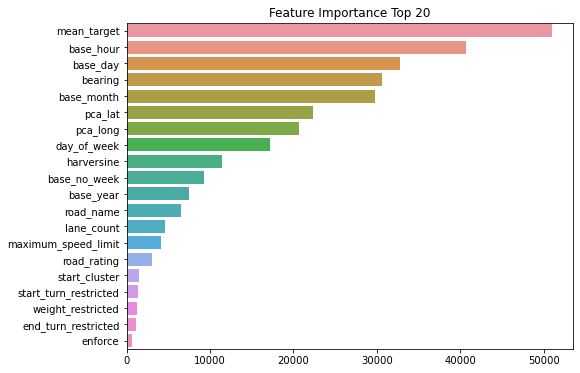

In [41]:
ft_importance_values = lgbm_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

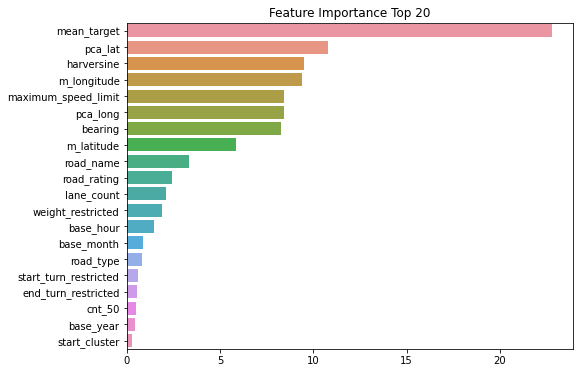

In [16]:
ft_importance_values = cat_reg.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

### Make Submission File

In [42]:
sample = pd.read_csv('../data/raw/sample_submission.csv')
sample['target'] = lgbm_reg.predict(X_test)
display(sample)

,id,target
0,TEST_000000,24.474615
1,TEST_000001,44.227604
2,TEST_000002,64.965025
3,TEST_000003,37.869854
4,TEST_000004,44.545557
...,...,...
291236,TEST_291236,48.327059
291237,TEST_291237,51.618948
291238,TEST_291238,21.328756
291239,TEST_291239,23.492948


In [43]:
date = str(pd.Timestamp.now())[:10].replace('-','')
sample.to_csv(f'../data/submission/{date}.csv', index=False)